<a href="https://colab.research.google.com/github/suafle/obs_astrophysics/blob/master/test_gaia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#--quiet is to show less information (Warinings, errors, and so on) when installing
#--pre is to install the pre-releases
!pip install --pre  --quiet astroquery

     |████████████████████████████████| 4.4MB 10.4MB/s 
     |████████████████████████████████| 2.3MB 43.2MB/s 
     |████████████████████████████████| 102kB 24.5MB/s 


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
from astropy import units as u

In [0]:
#checking vizier for WISE and 2MASS
#CHECK: VERY USEFUL

#catalog_list = Vizier.find_catalogs('IPAC')

#catalog_2mass = Vizier.get_catalogs(catalog_list.keys()[3]) #2MASS II/246
#catalog_wise = Vizier.get_catalogs(catalog_list.keys()[9]) #ALLWISE II/328

#Loading data
#2mass_data = Vizier(catalog='II/246',columns=['2MASS','RAJ2000','DEC2000'])
#wise_data = Vizier(catalog='II/328',columns=['ALLWISE','RAJ2000','DEC2000'])

#Gaia
#gaia_data = Vizier(catalog='I/345/gaia2',columns=['_RAJ2000','_DEC2000'],row_limit=100)
#print gaia_data
#gaia_data.get_catalogs('I/345/gaia2')[0]

**GAIA DR2 PASSBANDS** \
G: Green \
BP: Blue \
RP: Red \
<img
     src="https://www.cosmos.esa.int/documents/29201/1645651/GaiaDR2Passbands.png" width="400"/>
     
     
**WISE PASSBANDS** \

<img
     src="https://speclite.readthedocs.io/en/latest/_images/wise2010.png" width="400"/>

**2MASS PASSBANDS** \

<img
     src="http://www.ukidss.org/images/filters.gif" width="400"/>


Ordered from bluest to reddest

BP - RP - J - H - K - W1 - W2 - W3 - W4




In [0]:
#WISE data
wise_data = Vizier(catalog='II/328',columns=['ALLWISE','_RAJ2000','_DEJ2000','W1mag','W2mag','W3mag','W4mag','Jmag','Hmag','Kmag'],column_filters={'Jmag':'>-40'},row_limit=7000)
data_wise = wise_data.get_catalogs('II/328')[0]
#print data_wise #data wise es la tabla con los datos (convertible a dataframe de pandas)

In [5]:
#Matching
#Filtering (?)
#GAIA DATA
#Vizier.ROW_LIMIT = 5000 #Esto es el limite de datos -1 para ilimitado tambien se puede setear en row_limit
guide = Vizier(catalog="I/345",columns=['_RAJ2000','_DEJ2000','Gmag','BPmag','RPmag','Plx']).query_region(data_wise,radius="30s",inner_radius="0.001s")[0]

#RA and DEC for first catalog
ra1 = data_wise['_RAJ2000']
dec1 = data_wise['_DEJ2000']

#RA adn DEC for 2nd catalog
ra2 = guide['_RAJ2000']
dec2 = guide['_DEJ2000']

#matching
c = SkyCoord(ra=ra1,dec=dec1)
catalog = SkyCoord(ra=ra2,dec=dec2)
idx, d2d, d3d = c.match_to_catalog_sky(catalog) #idx contains the index of the matching

/usr/local/lib/python2.7/dist-packages/astropy/coordinates/angles.py:651: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/usr/local/lib/python2.7/dist-packages/astropy/coordinates/angles.py:651: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/usr/local/lib/python2.7/dist-packages/astropy/coordinates/angles.py:534: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/usr/local/lib/python2.7/dist-packages/astropy/coordinates/angles.py:534: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):


In [0]:
df = data_wise.to_pandas() #Dataframe with WISE colors and GAIA parallaxes
df['Plx'] = guide[idx]['Plx']
df['Gmag'] = guide[idx]['Gmag']
df['BPmag'] = guide[idx]['BPmag']
df['RPmag'] = guide[idx]['RPmag']
df = df.drop(df[df.Plx < 0].index)

In [0]:
par = df['Plx']
dist = 1000./par #en pc
mu = 5*np.log10(dist) #distance modulus

#apparent magnitude
g = df['Gmag']
bp = df['BPmag']
rp = df['RPmag']
j = df['Jmag']
h = df['Hmag']
k = df['Kmag']
w1 = df['W1mag']
w2 = df['W2mag']
w3 = df['W3mag']
w4 = df['W4mag']
        
#absolute magnitudes
G = g - mu
BP = bp - mu
RP = rp - mu
J = j - mu
H = h - mu
K = k - mu
W1 = w1 - mu
W2 = w2 - mu
W3 = w3 - mu
W4 = w4 - mu

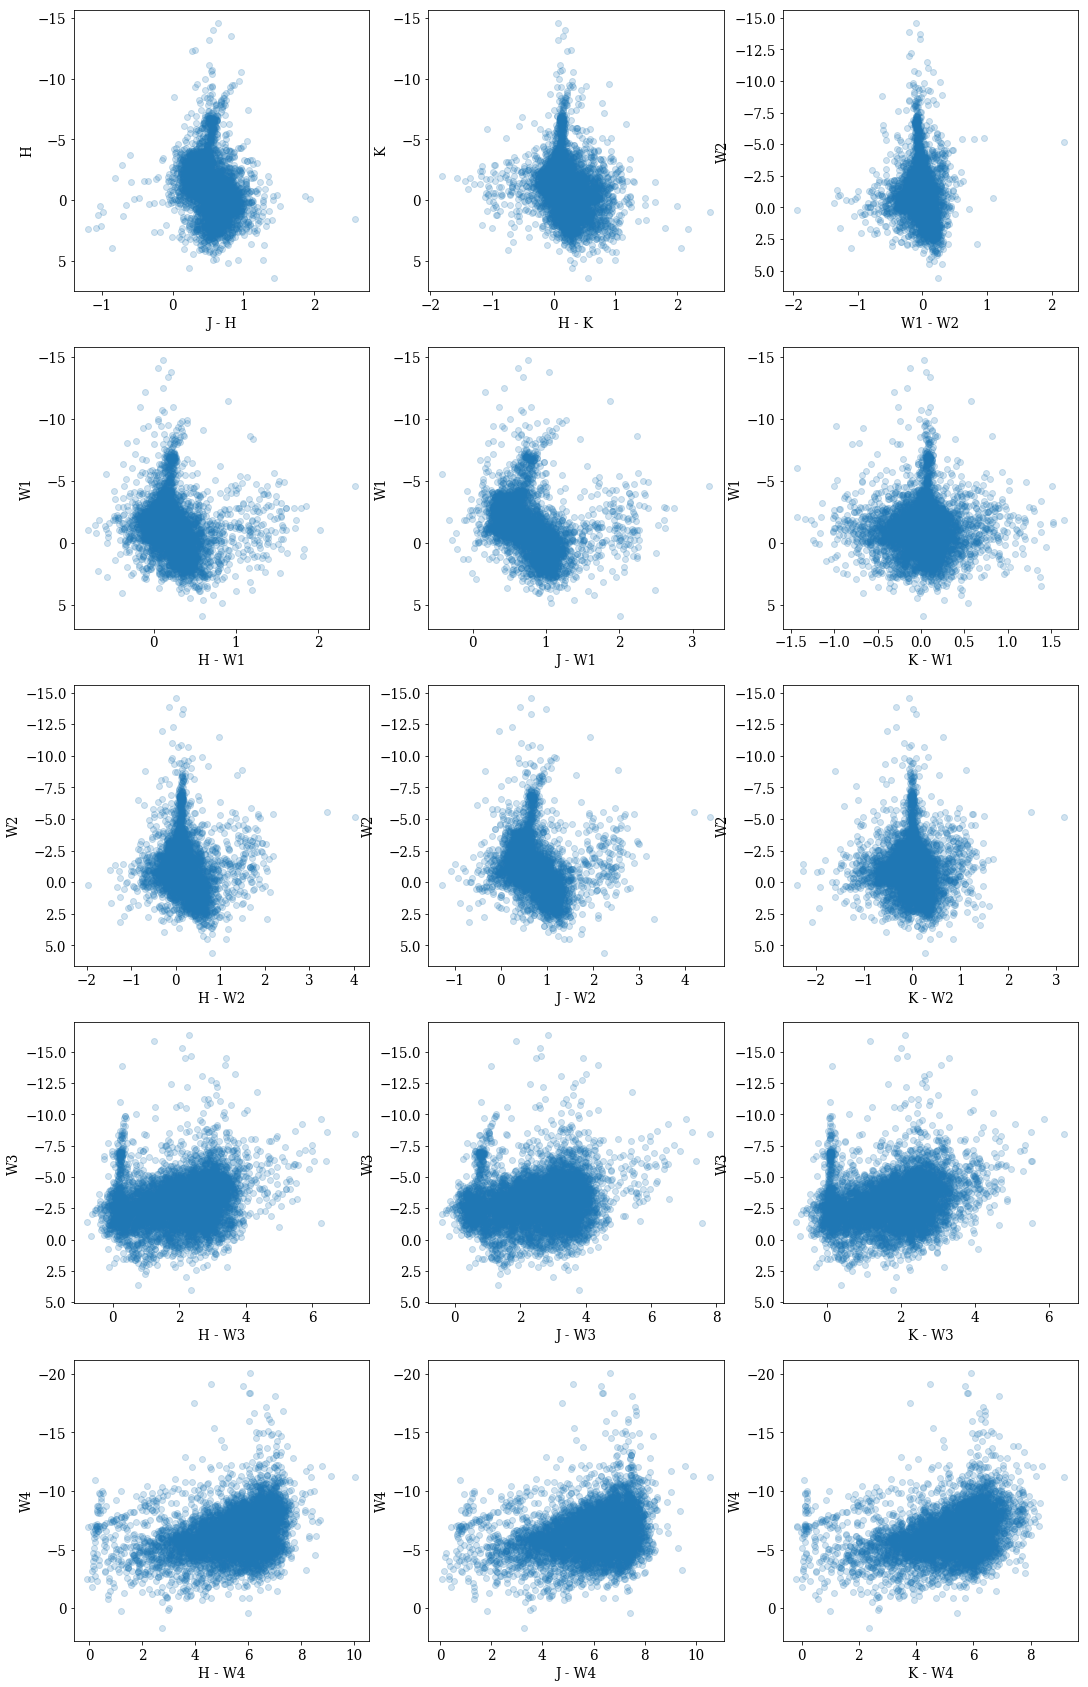

In [8]:
#Do not forget 
#BP - RP - J - H - K - W1 - W2 - W3 - W4

import matplotlib
from matplotlib import rc
#matplotlib.rcParams.update({'font.size': 14, 'text.usetex': True})
matplotlib.rcParams.update({'font.size': 13.5, 'font.family': 'serif'})

fig, ax = plt.subplots(figsize = (18,30), ncols = 3, nrows = 5)

ax[0][0].scatter(J - H, H, alpha = 0.2)
ax[0][0].set_xlabel('J - H')
ax[0][0].set_ylabel('H')
ax[0][0].invert_yaxis()

ax[0][1].scatter(H - K, H, alpha = 0.2)
ax[0][1].set_xlabel('H - K')
ax[0][1].set_ylabel('K')
ax[0][1].invert_yaxis()

ax[0][2].scatter(W1 - W2, W2, alpha = 0.2)
ax[0][2].set_xlabel('W1 - W2')
ax[0][2].set_ylabel('W2')
ax[0][2].invert_yaxis()


ax[1][0].scatter(H - W1, W1, alpha = 0.2)
ax[1][0].set_xlabel('H - W1')
ax[1][0].set_ylabel('W1')
ax[1][0].invert_yaxis()

ax[1][1].scatter(J - W1, W1, alpha = 0.2)
ax[1][1].set_xlabel('J - W1')
ax[1][1].set_ylabel('W1')
ax[1][1].invert_yaxis()

ax[1][2].scatter(K - W1, W1, alpha = 0.2)
ax[1][2].set_xlabel('K - W1')
ax[1][2].set_ylabel('W1')
ax[1][2].invert_yaxis()


ax[2][0].scatter(H - W2, W2, alpha = 0.2)
ax[2][0].set_xlabel('H - W2')
ax[2][0].set_ylabel('W2')
ax[2][0].invert_yaxis()

ax[2][1].scatter(J - W2, W2, alpha = 0.2)
ax[2][1].set_xlabel('J - W2')
ax[2][1].set_ylabel('W2')
ax[2][1].invert_yaxis()

ax[2][2].scatter(K - W2, W2, alpha = 0.2)
ax[2][2].set_xlabel('K - W2')
ax[2][2].set_ylabel('W2')
ax[2][2].invert_yaxis()


ax[3][0].scatter(H - W3, W3, alpha = 0.2)
ax[3][0].set_xlabel('H - W3')
ax[3][0].set_ylabel('W3')
ax[3][0].invert_yaxis()

ax[3][1].scatter(J - W3, W3, alpha = 0.2)
ax[3][1].set_xlabel('J - W3')
ax[3][1].set_ylabel('W3')
ax[3][1].invert_yaxis()

ax[3][2].scatter(K - W3, W3, alpha = 0.2)
ax[3][2].set_xlabel('K - W3')
ax[3][2].set_ylabel('W3')
ax[3][2].invert_yaxis()


ax[4][0].scatter(H - W4, W4, alpha = 0.2)
ax[4][0].set_xlabel('H - W4')
ax[4][0].set_ylabel('W4')
ax[4][0].invert_yaxis()

ax[4][1].scatter(J - W4, W4, alpha = 0.2)
ax[4][1].set_xlabel('J - W4')
ax[4][1].set_ylabel('W4')
ax[4][1].invert_yaxis()

ax[4][2].scatter(K - W4, W4, alpha = 0.2)
ax[4][2].set_xlabel('K - W4')
ax[4][2].set_ylabel('W4')
ax[4][2].invert_yaxis()